In [1]:
from data.reader import *
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
txs = create_transactions(selection)
selection = select_on_block_height(1,1000000, None)

block_info = defaultdict(lambda: {
    "actors": [],
    "tx_amounts": [],
    "n_transactions": 0
})

prev_block = None
for tx in txs:
    if prev_block and tx.block_height != prev_block:
        u_actors = len(set(block_info[prev_block]["actors"]))
        block_info[prev_block]["actors"] = u_actors
                
    block_info[tx.block_height]["actors"].extend([tx.to, tx.fr])
    block_info[tx.block_height]["tx_amounts"].append(tx.amount)
    block_info[tx.block_height]["n_transactions"] += 1
    
    prev_block = tx.block_height

KeyboardInterrupt: 

In [6]:
del block_info[prev_block]

In [7]:
n_transactions = [v["n_transactions"] for v in block_info.values()]
n_actors       = [v["actors"] for v in block_info.values()]
at_ratio = list(map(lambda x: x[0]/x[1], zip(n_actors, n_transactions)))

In [8]:
def create_histogram(data, xlabel, title, bins=100):
    # the histogram of the data
    n, bins, patches = plt.hist(data, bins)

    plt.xlabel(xlabel)
    plt.ylabel("Probability")
    plt.title(title)
    plt.grid(True)

    plt.show()

In [9]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

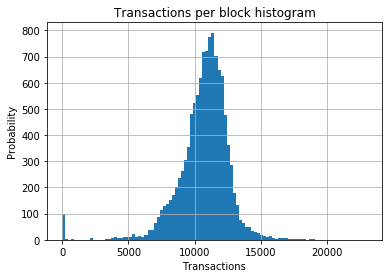

In [10]:
create_histogram(n_transactions, "Transactions", "Transactions per block histogram")

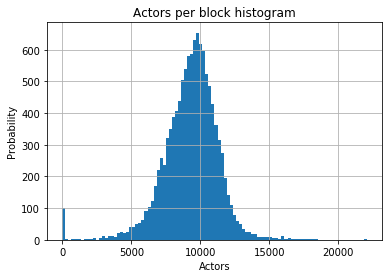

In [11]:
create_histogram(n_actors, "Actors", "Actors per block histogram")

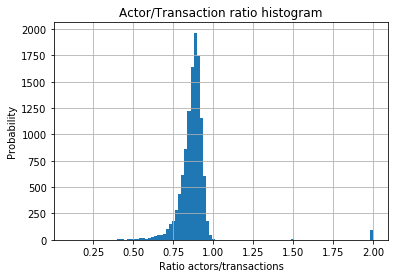

In [12]:
create_histogram(at_ratio, "Ratio actors/transactions", "Actor/Transaction ratio histogram")

In [13]:
amounts = np.array([amount for v in block_info.values() 
                    for amount in v["tx_amounts"]])

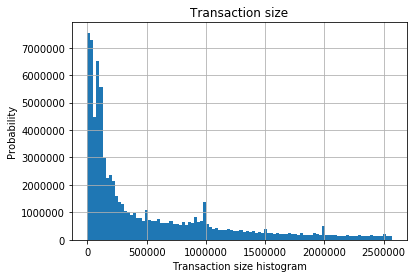

In [14]:
create_histogram(reject_outliers(amounts), "Transaction size histogram", "Transaction size", bins=100)

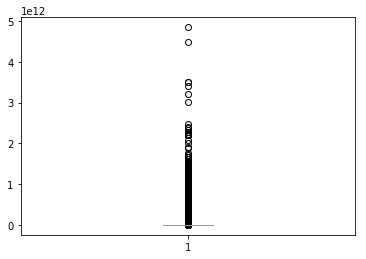

In [15]:
plt.boxplot(amounts)
plt.show()

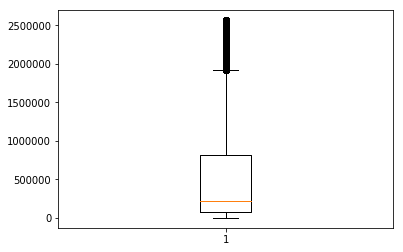

In [16]:
plt.boxplot(reject_outliers(amounts))
plt.show()

In [48]:
txs = create_transactions(selection)
selection = select_on_block_height(1,1000000, None)

block_info = defaultdict(lambda: {
    "actors": [],
    "tx_amounts": [],
    "n_transactions": 0
})

bin_size = 60*60*24*7 # week

prev_timestamp = None
prev_block = None
for tx in txs:
    if not prev_block:
        prev_timestamp = tx.timestamp
        prev_block = tx.block_height
    
    if prev_block and tx.timestamp > prev_timestamp + bin_size:
        u_actors = len(set(block_info[prev_block]["actors"]))
        block_info[prev_block]["actors"] = u_actors
        
        prev_block = tx.block_height
        prev_timestamp = tx.timestamp
                
    block_info[prev_block]["actors"].extend([tx.to, tx.fr])
    block_info[prev_block]["tx_amounts"].append(tx.amount)
    block_info[prev_block]["n_transactions"] += 1        

KeyboardInterrupt: 

In [49]:
del block_info[prev_block]

In [50]:
binned_n_transactions = [v["n_transactions"] for v in block_info.values()]
binned_n_actors       = [v["actors"] for v in block_info.values()]
binned_at_ratio       = list(map(lambda x: x[0]/x[1], zip(binned_n_actors, binned_n_transactions)))

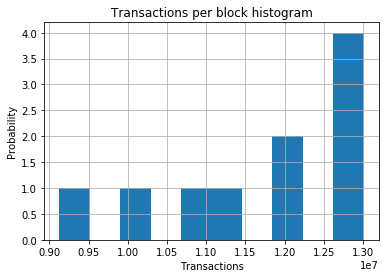

In [51]:
create_histogram(binned_n_transactions, "Transactions", "Transactions per block histogram", bins=10)

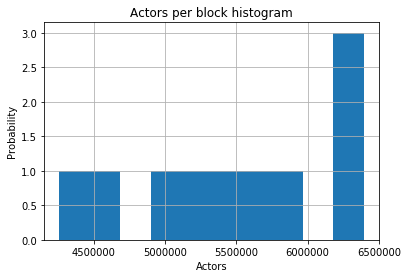

In [52]:
create_histogram(binned_n_actors, "Actors", "Actors per block histogram", bins=10)

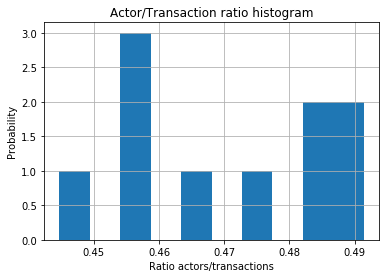

In [55]:
create_histogram(binned_at_ratio, "Ratio actors/transactions", "Actor/Transaction ratio histogram", bins=10)

In [57]:
txs = create_transactions(selection)
selection = select_on_block_height(1,1000000, None)

block_info = defaultdict(lambda: {
    "actors": [],
    "tx_amounts": [],
    "n_transactions": 0
})

bin_size = 60*60*24 # day

prev_timestamp = None
prev_block = None
for tx in txs:
    if not prev_block:
        prev_timestamp = tx.timestamp
        prev_block = tx.block_height
    
    if prev_block and tx.timestamp > prev_timestamp + bin_size:
        u_actors = len(set(block_info[prev_block]["actors"]))
        block_info[prev_block]["actors"] = u_actors
        
        prev_block = tx.block_height
        prev_timestamp = tx.timestamp
                
    block_info[prev_block]["actors"].extend([tx.to, tx.fr])
    block_info[prev_block]["tx_amounts"].append(tx.amount)
    block_info[prev_block]["n_transactions"] += 1        

KeyboardInterrupt: 

In [58]:
del block_info[prev_block]

In [59]:
binned_n_transactions = [v["n_transactions"] for v in block_info.values()]
binned_n_actors       = [v["actors"] for v in block_info.values()]
binned_at_ratio       = list(map(lambda x: x[0]/x[1], zip(binned_n_actors, binned_n_transactions)))

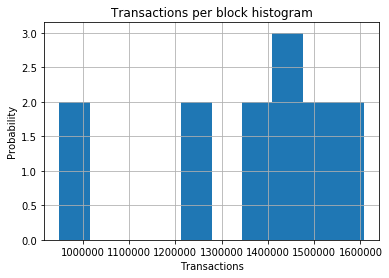

In [60]:
create_histogram(binned_n_transactions, "Transactions", "Transactions per block histogram", bins=10)

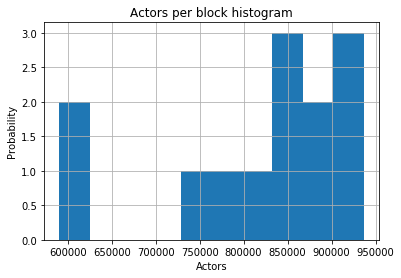

In [61]:
create_histogram(binned_n_actors, "Actors", "Actors per block histogram", bins=10)

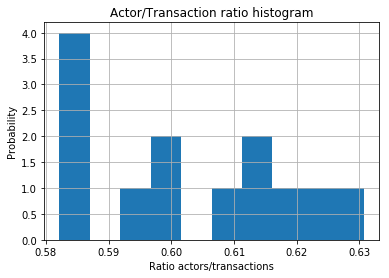

In [62]:
create_histogram(binned_at_ratio, "Ratio actors/transactions", "Actor/Transaction ratio histogram", bins=10)